 # PyPRT - ArcGIS API for Python Case Study

 Description: this notebook is used to test the ArcGIS API for Python in relation to pyprt module.

In [1]:
import sys, os
SDK_PATH = os.path.join(os.getcwd(), "..", "install", "bin")
sys.path.append(SDK_PATH)

In [2]:
import numpy as np
import pandas as pd
from copy import deepcopy

import pyprt

import arcgis
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.geometry import Geometry
from arcgis.features import SpatialDataFrame
from arcgis.features import FeatureLayerCollection
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.mapping import WebScene
from arcgis.mapping import SceneLayer

In [3]:
CS_FOLDER = os.getcwd()
def asset_file(filename):
    return os.path.join(CS_FOLDER, filename)

#### Test arcgis and pyprt module

In [5]:
my_gis = GIS(username="CLechot_zurich")
my_gis.map()

Enter password: ········


MapView(layout=Layout(height='400px', width='100%'))

In [6]:
VAL = pyprt.print_val(4074)
print("\nTest Function: it should print 4074.")
print(VAL)


Test Function: it should print 4074.
4074


In [7]:
print("\nInitializing PRT.")
pyprt.initialize_prt(SDK_PATH)

if(not pyprt.is_prt_initialized()):
    raise Exception("PRT is not initialized")


Initializing PRT.


In [9]:
mod = pyprt.ModelGenerator(asset_file("simple_scene_0.obj"))
generated_mod = mod.generate_model(asset_file("simple_rule2019.rpk"), ["ruleFile:string=bin/simple_rule2019.cgb", "startRule:string=Default$Footprint"], ["baseName:string=theModelSuper"])

if(len(generated_mod)>0):
    for model in generated_mod:
        geo = model.get_vertices()
        geo_numpy = np.array(geo)
        print("\nSize of the matrix containing the model vertices:")
        print(geo_numpy.shape)
        rep_float = model.get_float_report()
        rep_string = model.get_string_report()
        rep_bool = model.get_bool_report()
        print("Report of the generated model:")
        if(len(rep_float)):
            print(rep_float)
        if(len(rep_string)):
            print(rep_string)
        if(len(rep_bool)):
            print(rep_bool)
else:
    print("\nError while instanciating the model generator.")


Size of the matrix containing the model vertices:
(8, 3)
Report of the generated model:
{'Building Height.0': 11.216289520263672, 'Id': 0.0, 'Max Height.0': 30.0, 'Min Height.0': 10.0, 'Parcel Area.0': 4848.81103515625}


 ### 1. Get initial shape from ArcGIS

<Item title:"ParcelsValue_CopyFeatures3" type:Feature Layer Collection owner:CLechot_zurich>
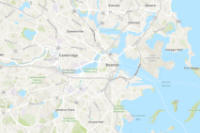

In [10]:
layer = my_gis.content.search("ParcelsValue_CopyFeatures3","Feature Layer")[0]
layer

In [11]:
map1 = my_gis.map()
map1

MapView(layout=Layout(height='400px', width='100%'))

In [12]:
location = geocode("Boston")[0]
map1.extent = layer.extent
map1.add_layer({"type":"FeatureLayer", 
                "url" : "https://services2.arcgis.com/cFEFS0EWrhfDeVw9/arcgis/rest/services/ParcelsValue_CopyFeatures3/FeatureServer"})

In [13]:
data_layer = pd.DataFrame.spatial.from_layer(layer.layers[0])
data_layer.head()

,AV_BLDG,AV_LAND,AV_TOTAL,BATCH,BRA_Name,CM_ID,DupPID,Exclude,Field,GA_int,...,YR_REMOD,Ycoord,YearBuilt,ZIPCODE,wtScoreImp,wtScoreLU,wtScoreRFAR,wtScoreSum,wtScoreVac,wtScoreYear
0,312100,133500,445600,None,None,,None,9,None,5524,...,1990,42.313235,1990,02121,0.25,2.25,0,3,0.25,0.25


In [14]:
fset = layer.layers[0].query()

In [15]:
fset.features[0].geometry

{'rings': [[[769658.44484809, 2939488.01055673],
   [769623.373328045, 2939394.37113264],
   [769592.044432029, 2939405.74610865],
   [769576.995504007, 2939411.24630065],
   [769610.200912043, 2939505.13468474],
   [769658.44484809, 2939488.01055673]]]}

In [16]:
g = Geometry(fset.features[0].geometry)
g.as_arcpy

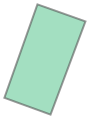

In [17]:
g

In [18]:
g.area

-5016.96142578125

In [19]:
theArrayFromArcGIS = g.coordinates()
theArrayFromArcGIS

array([[[ 769658.44484809, 2939488.01055673],
        [ 769623.37332805, 2939394.37113264],
        [ 769592.04443203, 2939405.74610865],
        [ 769576.99550401, 2939411.24630065],
        [ 769610.20091204, 2939505.13468474],
        [ 769658.44484809, 2939488.01055673]]])

In [20]:
g.type

'Polygon'

In [21]:
layer.layers[0].properties['extent']['spatialReference']

{'wkid': 102686, 'latestWkid': 2249}

### 2. PRT Generation

In [22]:
if(not pyprt.is_prt_initialized()):
    raise Exception("PRT is not initialized")

Test with quad-like initial shape:

In [23]:
v = [0, 0, 0,  0, 0, 2,  1, 0, 1,  1, 0, 0]
initialGeometry = pyprt.Geometry(v)

mod2 = pyprt.ModelGenerator([initialGeometry])
generated_mod2 = mod2.generate_model(asset_file("simple_rule2019.rpk"), ["ruleFile:string=bin/simple_rule2019.cgb", "startRule:string=Default$Footprint"], ["baseName:string=theModelSuper"])

if(len(generated_mod2)>0):
    for model2 in generated_mod2:
        geo2 = model2.get_vertices()
        geo_numpy2 = np.array(geo2)
        print("\nSize of the matrix containing all the model vertices:")
        print(geo_numpy2.shape)
        rep_float2 = model2.get_float_report()
        rep_string2 = model2.get_string_report()
        rep_bool2 = model2.get_bool_report()
        print("Report of the generated model:")
        if(len(rep_float2)):
            print(rep_float2)
        if(len(rep_string2)):
            print(rep_string2)
        if(len(rep_bool2)):
            print(rep_bool2)
else:
     print("\nError while instanciating the model generator.")


Size of the matrix containing all the model vertices:
(8, 3)
Report of the generated model:
{'Building Height.0': 11.216289520263672, 'Id': 0.0, 'Max Height.0': 30.0, 'Min Height.0': 10.0, 'Parcel Area.0': 1.5}


In [24]:
theAArray = theArrayFromArcGIS[0]
theAArray

array([[ 769658.44484809, 2939488.01055673],
       [ 769623.37332805, 2939394.37113264],
       [ 769592.04443203, 2939405.74610865],
       [ 769576.99550401, 2939411.24630065],
       [ 769610.20091204, 2939505.13468474],
       [ 769658.44484809, 2939488.01055673]])

 The coordinates are latitude and longitude of the vertices.

The polygon geometry in ArcGIS always contains one vertex more (which is a copy of the first point) that has to be removed. Moreover, as the geometry was in 2D, a third dimension is added and inserted at index 1 column.

In [25]:
a = theAArray[:-1]
c = np.insert(a, 1, 0, axis=1)
d = np.reshape(c,(1,c.shape[0]*c.shape[1]))

In [26]:
d

array([[ 769658.44484809,       0.        , 2939488.01055673,
         769623.37332805,       0.        , 2939394.37113264,
         769592.04443203,       0.        , 2939405.74610865,
         769576.99550401,       0.        , 2939411.24630065,
         769610.20091204,       0.        , 2939505.13468474]])

In [27]:
initialGeometry3 = pyprt.Geometry(d.tolist()[0])

In [28]:
mod3 = pyprt.ModelGenerator([initialGeometry3])
generated_mod3 = mod3.generate_model(asset_file("simple_rule2019.rpk"), ["ruleFile:string=bin/simple_rule2019.cgb", "startRule:string=Default$Footprint"], ["baseName:string=theModelSuper"])

In [29]:
if(len(generated_mod3)>0):
    for model3 in generated_mod3:
        geo3 = model3.get_vertices()
        geo_numpy3 = np.array(geo3)
        print("\nSize of the matrix containing all the model vertices:")
        print(geo_numpy3.shape)
        rep_float3 = model3.get_float_report()
        rep_string3 = model3.get_string_report()
        rep_bool3 = model3.get_bool_report()
        print("Report of the generated model:")
        if(len(rep_float3)):
            print(rep_float3)
        if(len(rep_string3)):
            print(rep_string3)
        if(len(rep_bool3)):
            print(rep_bool3)
else:
     print("\nError while instanciating the model generator.")


Size of the matrix containing all the model vertices:
(10, 3)
Report of the generated model:
{'Building Height.0': 11.216289520263672, 'Id': 0.0, 'Max Height.0': 30.0, 'Min Height.0': 10.0, 'Parcel Area.0': 5016.9609375}


We can see that the Parcel Area reported is equal to arcgis geometry area (without the negative sign).

In [30]:
print("\nShutdown PRT.")
pyprt.shutdown_prt()


Shutdown PRT.


 ### 3. From Python geometry to ArcGIS (THIS IS NOT WORKNIG...)

In [131]:
geo3

[[[0.0, 769658.4448523282, 2939488.0105556627],
  [0.0, 769623.3733267544, 2939394.3711284776],
  [0.0, 769592.0444350003, 2939405.7461055894],
  [0.0, 769576.9955076932, 2939411.2463039537],
  [0.0, 769610.2009176968, 2939505.134682097],
  [11.216289520263672, 769658.4448523282, 2939488.0105556627],
  [11.216289520263672, 769623.3733267544, 2939394.3711284776],
  [11.216289520263672, 769592.0444350003, 2939405.7461055894],
  [11.216289520263672, 769576.9955076932, 2939411.2463039537],
  [11.216289520263672, 769610.2009176968, 2939505.134682097]]]

In [35]:
geo_numpy3

array([[[7.69658445e+05, 0.00000000e+00, 2.93948801e+06],
        [7.69623373e+05, 0.00000000e+00, 2.93939437e+06],
        [7.69592044e+05, 0.00000000e+00, 2.93940575e+06],
        [7.69576996e+05, 0.00000000e+00, 2.93941125e+06],
        [7.69610201e+05, 0.00000000e+00, 2.93950513e+06],
        [7.69658445e+05, 1.12162895e+01, 2.93948801e+06],
        [7.69623373e+05, 1.12162895e+01, 2.93939437e+06],
        [7.69592044e+05, 1.12162895e+01, 2.93940575e+06],
        [7.69576996e+05, 1.12162895e+01, 2.93941125e+06],
        [7.69610201e+05, 1.12162895e+01, 2.93950513e+06]]])

In [36]:
template_feature = deepcopy(layer.layers[0].query().features[0])

In [37]:
template_feature.geometry['rings']

[[[769658.44484809, 2939488.01055673],
  [769623.373328045, 2939394.37113264],
  [769592.044432029, 2939405.74610865],
  [769576.995504007, 2939411.24630065],
  [769610.200912043, 2939505.13468474],
  [769658.44484809, 2939488.01055673]]]

In [38]:
geo3_process = geo3[0]
for row in geo3_process:
    row[1], row[2] = row[2], row[1]

In [39]:
geo3_process

[[769658.4448523282, 2939488.0105556627, 0.0],
 [769623.3733267544, 2939394.3711284776, 0.0],
 [769592.0444350003, 2939405.7461055894, 0.0],
 [769576.9955076932, 2939411.2463039537, 0.0],
 [769610.2009176968, 2939505.134682097, 0.0],
 [769658.4448523282, 2939488.0105556627, 11.216289520263672],
 [769623.3733267544, 2939394.3711284776, 11.216289520263672],
 [769592.0444350003, 2939405.7461055894, 11.216289520263672],
 [769576.9955076932, 2939411.2463039537, 11.216289520263672],
 [769610.2009176968, 2939505.134682097, 11.216289520263672]]

In [40]:
geo3_process.append(geo3_process[0])
geo3_process

[[769658.4448523282, 2939488.0105556627, 0.0],
 [769623.3733267544, 2939394.3711284776, 0.0],
 [769592.0444350003, 2939405.7461055894, 0.0],
 [769576.9955076932, 2939411.2463039537, 0.0],
 [769610.2009176968, 2939505.134682097, 0.0],
 [769658.4448523282, 2939488.0105556627, 11.216289520263672],
 [769623.3733267544, 2939394.3711284776, 11.216289520263672],
 [769592.0444350003, 2939405.7461055894, 11.216289520263672],
 [769576.9955076932, 2939411.2463039537, 11.216289520263672],
 [769610.2009176968, 2939505.134682097, 11.216289520263672],
 [769658.4448523282, 2939488.0105556627, 0.0]]

In [41]:
template_feature.geometry['rings'] = [geo3_process]

In [43]:
template_feature.geometry

{'rings': [[[769658.4448523282, 2939488.0105556627, 0.0],
   [769623.3733267544, 2939394.3711284776, 0.0],
   [769592.0444350003, 2939405.7461055894, 0.0],
   [769576.9955076932, 2939411.2463039537, 0.0],
   [769610.2009176968, 2939505.134682097, 0.0],
   [769658.4448523282, 2939488.0105556627, 11.216289520263672],
   [769623.3733267544, 2939394.3711284776, 11.216289520263672],
   [769592.0444350003, 2939405.7461055894, 11.216289520263672],
   [769576.9955076932, 2939411.2463039537, 11.216289520263672],
   [769610.2009176968, 2939505.134682097, 11.216289520263672],
   [769658.4448523282, 2939488.0105556627, 0.0]]]}

##### Test for visualizing 3D content:

The following scene layer was generated using arcpy FeaturesFromCityEngineRules_3d function. It was used to see in which format ArcGIS Pro would use for this type of 3D shape.

In [52]:
hello2 = my_gis.content.search("ParcelGenerated_shareAsWeb")
hello2

[<Item title:"ParcelGenerated_shareAsWeb" type:Feature Layer Collection owner:CLechot_zurich>,
 <Item title:"ParcelGenerated_shareAsWeb" type:Scene Layer owner:CLechot_zurich>,
 <Item title:"ParcelGenerated_shareAsWeb" type:Service Definition owner:CLechot_zurich>]

In [61]:
asdf = SceneLayer(hello2)

In [64]:
asdf

<SceneLayer url:"[<Item title:"ParcelGenerated_shareAsWeb" type:Feature Layer Collection owner:CLechot_zurich>, <Item title:"ParcelGenerated_shareAsWeb" type:Scene Layer owner:CLechot_zurich>, <Item title:"ParcelGenerated_shareAsWeb" type:Service Definition owner:CLechot_zurich>]">

In [66]:
map10 = my_gis.map()
map10.add_layer(hello2[1])
map10

MapView(layout=Layout(height='400px', width='100%'))

##### Test for displaying web scene:

In [75]:
existing_empty_webscene = my_gis.content.search('TestScene')
existing_empty_webscene

[<Item title:"TestScene" type:Web Scene owner:CLechot_zurich>,
 <Item title:"testscene" type:Web Scene owner:twaeny_zurich>,
 <Item title:"TestScene" type:Web Scene owner:thom8300>]

In [77]:
existing_empty_webscene[0].type

'Web Scene'

In [79]:
existing_empty_webscene[0].update(item_properties={'geometry':template_feature.geometry})

True

In [81]:
scene = WebScene(existing_empty_webscene[0])
scene

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'), mode='3D')

The webscene does not show any shape.

 ### 4. Generated Model Visualization

In [31]:
from pythreejs import *
import itertools

In [32]:
face_geo3 = mod3.get_model_geometry_faces()

In [33]:
mat = geo3.copy()

In [34]:
for col in mat[0]:
    col[1], col[2] = col[2], col[1]

In [35]:
mat_f = []
for k in range(geo_numpy3.shape[0]):
    mat_faces = []
    for f in face_geo3[k]:
        if(len(f) == 3):
            mat_faces.append(f)
        elif(len(f) > 3):
            # in vispy, 3 vertex indices per face
            for new_f in map(list,itertools.combinations(f,3)):
                mat_faces.append(new_f)
        elif(len(f) < 3):
            # repeat one vertex index
            current_ind = 0
            new_f2 = []
            while(len(new_f2) < 3):
                new_f2.append(f[current_ind])
                if(current_ind < len(f)-1):
                    current_ind += 1
                else:
                    while(len(new_f2) < 3):
                        new_f2.append(f[current_ind])
                    current_ind += 1

            mat_faces.append(new_f2)

    mat_f.append(mat_faces)

In [36]:
colors = ['#000000', '#0000ff', '#00ff00', '#ff0000','#00ffff', '#ff00ff', '#ffff00', '#ffffff','#000000', '#0000ff', '#00ff00', '#ff0000','#00ffff', '#ff00ff', '#ffff00', '#ffffff','#000000', '#0000ff', '#00ff00', '#ff0000','#00ffff', '#ff00ff', '#ffff00', '#ffffff','#000000', '#0000ff', '#00ff00', '#ff0000','#00ffff', '#ff00ff', '#ffff00', '#ffffff','#000000', '#0000ff', '#00ff00', '#ff0000','#00ffff', '#ff00ff', '#ffff00', '#ffffff','#000000', '#0000ff', '#00ff00', '#ff0000','#00ffff', '#ff00ff', '#ffff00', '#ffffff','#000000', '#0000ff', '#00ff00', '#ff0000','#00ffff', '#ff00ff', '#ffff00', '#ffffff','#000000', '#0000ff', '#00ff00', '#ff0000','#00ffff', '#ff00ff', '#ffff00', '#ffffff','#000000', '#0000ff', '#00ff00', '#ff0000','#00ffff', '#ff00ff', '#ffff00', '#ffffff']

In [48]:
faces=mat_f[0]
faces = [faces[i] + [None,  [colors[2] for i in faces[i]], None] for i in range(0,len(faces))]

# Create the geometry:
myGeometry = Geometry(
    vertices=mat[0],
    faces=faces
)

# Create a mesh. Note that the material need to be told to use the vertex colors.
mesh = Mesh(
    geometry=myGeometry,
    material=MeshBasicMaterial(vertexColors='VertexColors'),
    position=[mat[0][0][i]*-1 for i in range(len(mat[0][0]))],
)

In [49]:
scene = Scene(children=[mesh], background=None)

c = PerspectiveCamera(position=[3,3,3], zoom = 0.05)

rendererGeo = Renderer(camera=c, scene=scene, alpha=True, clearOpacity=0, controls=[OrbitControls(controlling=c)], width=600, height=400)

display(rendererGeo)

Renderer(camera=PerspectiveCamera(position=(3.0, 3.0, 3.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.0, 1.0, …

This visualization is not good... I time boxed this task and wasn't able to give a proper model visualization.